# Extract and Analyze Twitter Data

The tweet data is retrieved using the Twitter Developer Platform and spaCy models are used for natural language processesing. Binary classification is used to score the sentiment of the tweets; 1 designated as positive, 0 as negative and a .5 threshold. 

Use this worksheet to update the query and conduct your own research!

## Install required packages as necessary
Download the spaCy English pipeline from the terminal window: python -m spacy download en_core_web_lg

In [1]:
%pip install requests
%pip install pandas
%pip install pyyaml
%pip install datetime
%pip install pandas
%pip install numpy
%pip install datetime
%pip install matplotlib 
%pip install wordcloud

%pip install seaborn
%pip install spacy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import requests
import pandas as pd
import json
import ast
import yaml 

In [4]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime, date

## Setup Bearer Token to Use Twitter API
Save your Twitter token in a plain text file, with a .yaml exension, containing only the following: 
BEARER_TOKEN: "***"

In [5]:
#AUTHENTICATION SETUP

#function to read in YAML file containing your bearer token
def process_yaml():
    with open("/Users/tdubon/twitter/config.yaml") as file:
        return yaml.safe_load(file)
     
#access bearer token
def create_bearer_token(data):
    return data["BEARER_TOKEN"] 


#connect to Twitter API
def twitter_auth_and_connect(bearer_token, url):
    headers = {"Authorization": "Bearer{}".format(bearer_token)}
    response = requests.request("GET", url, headers=headers)
    return response.json()

## Retrieve data from Twitter
Enter keywords for query in the create_url() function. See https://tinyurl.com/2j5phrhu for instructions on customizing your query syntax

In [29]:
def create_url():
    query='(Putin OR Lukashenka OR Russia OR "Vladimir Putin" OR Zelensky OR Ukraine OR Kyiv OR Kharkiv OR Chernihiv OR Mykolaiv OR Mariupol OR "Volodymyr Zelenskyy") -is:retweet lang:en'
    max_results= 100
    mrf = "max_results={}".format(max_results)
    tweet_fields = "tweet.fields=created_at,public_metrics,context_annotations,text,possibly_sensitive,geo"
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&{}".format(query, mrf, tweet_fields)
    return url

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

Update path below to save to your own desktop

In [30]:
def main():
    url= create_url()
    data = process_yaml()
    bearer_token = create_bearer_token(data)
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    print(json.dumps(json_response, indent=4, sort_keys=True))
    with open("/Users/tdubon/twitter/downloaded_tweets2.json", "w") as json_file:
        json.dump(json_response, json_file)

In [31]:
main()

200
{
    "data": [
        {
            "context_annotations": [
                {
                    "domain": {
                        "description": "Ongoing News Stories like 'Brexit'",
                        "id": "123",
                        "name": "Ongoing News Story"
                    },
                    "entity": {
                        "id": "1484601166080081920",
                        "name": "Russo-Ukrainian conflict"
                    }
                }
            ],
            "created_at": "2022-05-07T03:27:08.000Z",
            "id": "1522780042014576640",
            "possibly_sensitive": false,
            "public_metrics": {
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "Answer to As a Russian, what do you think of Ukrainians demonstrating against Russia's occupation in cities like Kherson? by Ekaterina Shevchenko https://

## Extract Data from JSON File

In [42]:
#read the JSON file back in

with open("/Users/tdubon/twitter/downloaded_tweets2.json", "r") as f:
    read_content = json.load(f)

Inspect json data

In [43]:
# Inspect json data
read_content["data"]

[{'created_at': '2022-05-07T03:27:08.000Z',
  'id': '1522780042014576640',
  'possibly_sensitive': False,
  'public_metrics': {'retweet_count': 0,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'text': "Answer to As a Russian, what do you think of Ukrainians demonstrating against Russia's occupation in cities like Kherson? by Ekaterina Shevchenko https://t.co/Vm38XEjR9y",
  'context_annotations': [{'domain': {'id': '123',
     'name': 'Ongoing News Story',
     'description': "Ongoing News Stories like 'Brexit'"},
    'entity': {'id': '1484601166080081920',
     'name': 'Russo-Ukrainian conflict'}}]},
 {'created_at': '2022-05-07T03:27:07.000Z',
  'id': '1522780038931914752',
  'possibly_sensitive': False,
  'public_metrics': {'retweet_count': 0,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'text': 'Defenders inside Ukrainian steel mill refuse to surrender\nhttps://t.co/bP7r8ZtzoI',
  'context_annotations': [{'domain': {'id': '123',
     'name': 'On

In [44]:
len(read_content["data"])

100

#### Define functions to retrieve each tweet field of interest

In [75]:
#Initialize Lists
id_data = []
date_data = [] 
rtwt_data = []
reply_data = []
text_data = []

#lang_data = []

In [76]:
def get_id():
    for data in read_content["data"]:
        id_record = data["id"]
        id_data.append(id_record)

def get_created_at():
    for data in read_content["data"]:
        date_record = data["created_at"]
        date_data.append(date_record)
   

def retweet_count():
    for retweets in read_content["data"]:
        rtwt_count=retweets["public_metrics"]["retweet_count"] 
        rtwt_data.append(rtwt_count)

def reply_count():
    for reply in read_content["data"]:
        reply_count = reply["public_metrics"]["reply_count"]
        reply_data.append(reply_count)

        
def get_text():
    for data in read_content["data"]:
        text_record = data["text"]
        text_data.append(text_record)
                
def get_domain():
    d_id = []
    d_name = []
    d_desc = []
    d_twt_id = []
    
    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    d_id.append(d["domain"]["id"])
                    d_name.append(d["domain"]["name"])
                    d_desc.append(d["domain"]["description"])
                    d_twt_id.append(j["id"])
                    
    domain = {"id": d_id, "name": d_name, "desc": d_desc,"tweet id": d_twt_id}
    return domain


def get_entity():    
    e_id = []
    e_name = []
    e_desc = []
    e_twt_id = []

    for j in read_content["data"]:
        for i in j:
            if i == "context_annotations":
                for d in j["context_annotations"]:
                    e_id.append(d["entity"]["id"])
                    e_name.append(d["entity"]["name"])
                    e_twt_id.append(j["id"])
                
    entity = {"id": e_id, "name": e_name, "desc": e_desc,"tweet id": e_twt_id}
    return entity



In [77]:
def main():
    get_id() 
    get_created_at() 
    retweet_count()
    reply_count() 
    get_text()
    get_domain()
    get_entity()

main()


In [78]:
print(get_entity())

{'id': ['1484601166080081920', '1484601166080081920', '1484601166080081920', '864931126132985856', '864931126132985856', '1498702169922420739', '1498702169922420739', '1484601166080081920', '10040395078', '10040395078', '1484601166080081920', '1484601166080081920', '1484601166080081920', '1484601166080081920', '1498702169922420739', '1498702169922420739', '1484601166080081920', '1484601166080081920', '1484601166080081920', '10040667273', '1484601166080081920', '1484601166080081920', '781974596157181956', '781974596752842752', '1286296657135468545', '1286296657135468545', '1484601166080081920', '1196446161223028736', '864931126132985856', '864931126132985856', '1065654169002885120', '1484601166080081920', '864931126132985856', '864931126132985856', '1484601166080081920', '1484601166080081920', '781974597302226944', '848920371311001600', '1484601166080081920', '848920371311001600', '10040395078', '10040395078', '847528391163092993', '847528576551337984', '1484601166080081920', '100377214

In [79]:
print(get_domain())

{'id': ['123', '123', '123', '10', '35', '10', '35', '123', '10', '35', '123', '123', '123', '123', '10', '35', '123', '123', '123', '47', '123', '123', '46', '46', '47', '47', '123', '165', '10', '35', '47', '123', '10', '35', '123', '123', '45', '30', '123', '165', '10', '35', '65', '66', '123', '10', '35', '11', '12', '26', '123', '88', '123', '123', '47', '123', '10', '35', '123', '46', '47', '123', '10', '35', '123', '123', '123', '123', '123', '123', '123', '88', '123', '10', '35', '88', '123', '123', '123', '156', '10', '35', '123', '159', '123', '10', '94', '123', '3', '3', '3', '123', '123', '123', '123', '123', '123', '123', '123', '123', '10', '35', '123', '123', '45', '46', '46', '47', '123', '123', '123', '10', '94', '123', '10', '120', '123', '123', '10', '35', '123', '10', '35', '45', '46', '47', '123', '123', '123', '123', '10', '35', '123', '10', '35', '10', '35', '123', '10', '10', '35', '35', '123', '10', '35', '123', '10', '94', '123', '3', '4', '10', '29', '35', '1

In [80]:
print(len(id_data), len(date_data), len(rtwt_data), len(reply_data), len(text_data))

100 100 100 100 100


In [81]:
#save tweet fields to dataframe (does not include entity or domain data)
save_data = {"id": id_data, "date": date_data, "retweet count": rtwt_data, "reply count": reply_data, "text": text_data}
df = pd.DataFrame(save_data)
df.columns
df.head()
df.to_csv("/Users/tdubon/twitter/pol_tweet_data.csv")

In [82]:
#inspect data
len(df)

100

In [83]:
print(df)

                     id                      date  retweet count  reply count  \
0   1522780042014576640  2022-05-07T03:27:08.000Z              0            0   
1   1522780038931914752  2022-05-07T03:27:07.000Z              0            0   
2   1522780037467963393  2022-05-07T03:27:07.000Z              0            0   
3   1522780035119075329  2022-05-07T03:27:06.000Z              1            0   
4   1522780022645403649  2022-05-07T03:27:03.000Z              0            0   
..                  ...                       ...            ...          ...   
95  1522779803119763458  2022-05-07T03:26:11.000Z              0            0   
96  1522779797734240259  2022-05-07T03:26:10.000Z              0            0   
97  1522779795834253317  2022-05-07T03:26:09.000Z              0            0   
98  1522779793405665287  2022-05-07T03:26:09.000Z              0            0   
99  1522779791438491648  2022-05-07T03:26:08.000Z              0            0   

                           

## Date Formatting

In [84]:
format_data = "%Y-%m-%dT%H:%M:%S.%fZ"
df['date_frmt'] = [datetime.strptime(i, format_data) for i in df['date']]

In [85]:
df = df.drop(columns="date")

In [86]:
df.head()

,id,retweet count,reply count,text,date_frmt
0,1522780042014576640,0,0,"Answer to As a Russian, what do you think of U...",2022-05-07 03:27:08
1,1522780038931914752,0,0,Defenders inside Ukrainian steel mill refuse t...,2022-05-07 03:27:07
2,1522780037467963393,0,0,@lhart41 A LOSE-LOSE situation from inept war ...,2022-05-07 03:27:07
3,1522780035119075329,1,0,"To follow up from @11thHour , it is the job of...",2022-05-07 03:27:06
4,1522780022645403649,0,0,@ng_ukraine This one broke my heart,2022-05-07 03:27:03


## Text Cleaning and Formatting

In [87]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import seaborn as sns
import string
import warnings
import spacy

In [88]:
#preliminary text cleaning
df["text"]=[i.strip().lower() for i in df["text"]]

In [89]:
df.head()

,id,retweet count,reply count,text,date_frmt
0,1522780042014576640,0,0,"answer to as a russian, what do you think of u...",2022-05-07 03:27:08
1,1522780038931914752,0,0,defenders inside ukrainian steel mill refuse t...,2022-05-07 03:27:07
2,1522780037467963393,0,0,@lhart41 a lose-lose situation from inept war ...,2022-05-07 03:27:07
3,1522780035119075329,1,0,"to follow up from @11thhour , it is the job of...",2022-05-07 03:27:06
4,1522780022645403649,0,0,@ng_ukraine this one broke my heart,2022-05-07 03:27:03


In [90]:
#removing 
def cleanup_text(file, rem_item):
    r = re.findall(rem_item, file)
    for i in r:
        file = re.sub(i, "", file)
    return file

In [91]:
#remove handles
df["clean text"] = np.vectorize(cleanup_text)(df["text"], '@[\w]*')

In [92]:
#remove hyperlinks
df["clean text"] = np.vectorize(cleanup_text)(df["clean text"], r'https?://\S+')

In [93]:
#remove new line notation
df["clean text"] = np.vectorize(cleanup_text)(df["clean text"], '\n[\w]*')

In [94]:
#remove punctuation
df["clean text"] = np.vectorize(cleanup_text)(df["clean text"], '#[\w]*')

In [95]:
len(df["clean text"])
print(df["clean text"])

0     answer to as a russian, what do you think of u...
1     defenders inside ukrainian steel mill refuse t...
2      a lose-lose situation from inept war of choic...
3     to follow up from  , it is the job of journali...
4                               this one broke my heart
                            ...                        
95                             great thread on russia: 
96       tucker is a genius, he exposes the insanity...
97     but we knew. it’s why we were glued to daily ...
98     there'll be a tough time trying to lay this s...
99    may 5. l. wilkerson (ret) took to the airwaves...
Name: clean text, Length: 100, dtype: object


### Tokenize text in spaCy

In [96]:
nlp = spacy.load("en_core_web_lg")

#to load previously trained model saved to your PC use next line instead:
#nlp = spacy.load("/Users/tdubon/spaCy_models")

#tokens saved as strings needed for entity recognition
#convert to strings and save to text
text = str(df["clean text"])
#save tokens to doc
doc = nlp(text)

In [97]:
#Tokens needed for word cloud and classification saved into dataframe
#process each row in clean text column
df["nlp_proc"] = [nlp(i) for i in df["clean text"]]

In [98]:
#remove stop words and punctuation
stop_words = []

def remove_words(doc):
    for token in doc:
        if token.is_punct == True:
            stop_words.append(token)
        
        if token.is_stop == True:
            stop_words.append(token)

In [99]:
for i in df["nlp_proc"]:
    remove_words(i)

In [100]:
#create list of words
doc_list = []

for i in df["nlp_proc"]:
    for token in i:
        if token not in stop_words:
            doc_list.append(token.text)

In [101]:
doc_list

['answer',
 'russian',
 'think',
 'ukrainians',
 'demonstrating',
 'russia',
 'occupation',
 'cities',
 'like',
 'kherson',
 'ekaterina',
 'shevchenko',
 'defenders',
 'inside',
 'ukrainian',
 'steel',
 'mill',
 'refuse',
 'surrender',
 ' ',
 'lose',
 'lose',
 'situation',
 'inept',
 'war',
 'choice',
 'delusional',
 'putin',
 'amp',
 'generals.ukraine',
 'brave',
 'resistance',
 'modern',
 'destruction',
 'amp',
 'colonization',
 'surprising',
 'follow',
 ' ',
 'job',
 'journalists',
 'report',
 'information',
 'usg',
 'official',
 'sgivem',
 ' ',
 'usg',
 'officials',
 'giving',
 'secret',
 'information',
 'damages',
 'interests',
 'officials',
 'zelensky',
 'biden',
 'teams',
 'said',
 'today',
 ' ',
 'broke',
 'heart',
 ' ',
 'course',
 'assumes',
 'russia',
 'win',
 'war',
 'kind',
 'mobilization',
 '  ',
 '🔗',
 ' ',
 'video',
 'requested',
 'download',
 'ready',
 '🆗',
 'russia',
 'invading',
 'ukraine',
 '🇺',
 '🇦',
 '[ads]',
 '🔗',
 'download',
 'use',
 'instead',
 '   ',
 'helpin

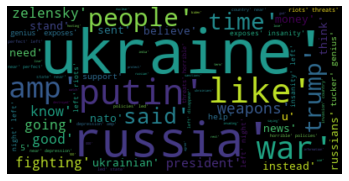

In [102]:
#wordcloud
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True).generate(str(doc_list))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Prepare text for analysis

In [103]:
import random
from spacy.training import Example
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

In [104]:
#set the threshold value in config and add textcat pipeline

config = {
    "threshold": 0.5,
    "model": DEFAULT_SINGLE_TEXTCAT_MODEL }

textcat = nlp.add_pipe("textcat", config=config) 

In [105]:
#Review entities recognized
for i in df["nlp_proc"]:
    for ent in i.ents:
        print(ent.text, ent.label_)

russian NORP
ukrainians NORP
russia GPE
kherson LOC
ekaterina shevchenko PERSON
ukrainian NORP
usg ORG
usg ORG
zelensky PERSON
biden PERSON
today DATE
russia GPE
russia GPE
ukraine GPE
ukraine GPE
uk GPE
4,000 CARDINAL
ukraine GPE
canadian NORP
ukraine GPE
un ORG
ukraine GPE
first ORDINAL
ukraine GPE
uno ORG
ukraine GPE
ukraine GPE
vladimir putin news page's PERSON
the year DATE
2025 DATE
russia GPE
ukraine GPE
ukraine GPE
russia GPE
biden PERSON
ukraine GPE
100 billion more dollars MONEY
russia GPE
america GPE
2 CARDINAL
america GPE
first ORDINAL
ukraine GPE
nato ORG
russia GPE
third ORDINAL
100% PERCENT
russian NORP
india GPE
russia GPE
eu GPE
russia GPE
british NORP
the soviet union GPE
russia GPE
zelensky PERSON
ukraine GPE
ukraine GPE
ukraine GPE
30 million CARDINAL
ukraine GPE
a good % PERCENT
only 2 days DATE
3:1 CARDINAL
russia GPE
ukraine GPE
ukraine GPE
russians NORP
europe LOC
nato ORG
ukraine GPE
clinton PERSON
russia GPE
fbi intel ORG
russia GPE
christian NORP
russian NORP

In [108]:
#Add a category for entities of interest, if needed. 
from spacy.matcher import PhraseMatcher 
matcher = PhraseMatcher(nlp.vocab) 

#define politicians as entities 
terms = ["Putin", "putin", "Zelensky", "zelensky"] 
patterns = [nlp.make_doc(term) for term in terms] 
matcher.add("politiciansList", None, *patterns) 

matches = matcher(doc) 

In [109]:
#this prints out the spans where the instances are found and the entity identified
for mid, start, end in matches: 
    print(start, end, doc[start:end])

## Text Classification

In [110]:
#create training data for your example consisting of examples of positive and negative sentiment
train_data = [("Helping refugees. This is what kindness looks like.", {"cats": {"POS": True}}),
              ("In this time of uncertainty, we have a clear way forward: Help Ukraine defend itself. Support the Ukrainian people. Hold Russia accountable.", {"cats": {"POS": True}}),
              ("Priests demand head of Ukrainian Orthodox Church Moscow Patriarchate be brought to church tribunal for position on war.", {"cats": {"POS": True}}),
              ("Mayor of the most northern village in Ukraine Hremiach Hanna Havrylina was released after yesterday’s prisoners’ swap.", {"cats": {"POS": True}}),
              ("Look at this female volunteer from Belarus fighting alongside Ukrainians.", {"cats": {"POS": True}}),
              ("Russian soldiers: They're animals... Humans don't behave like this. My parents told me about WW2 & the fascists didn't even do such things.", {"cats": {"NEG": True}}),
              ("All Russians are evil", {"cats": {"NEG": True}}),
              ("The West is pushing Ukraine toward a conflict.", {"cats": {"NEG": True}}),
              ("Cowards", {"cats": {"NEG": True}}),
              ("Russia’s deployment of combat forces is a mere repositioning of troops on its own territory.", {"cats": {"NEG": True}}),
              ("Ukraine and Ukrainian government officials are the aggressor in the Russia-Ukraine relationship.", {"cats": {"NEG": True}})] 

In [111]:
textcat.add_label("POS")
textcat.add_label("NEG")
    
train_examples = [Example.from_dict(nlp.make_doc(text), label) for text,label in train_data] 

In [112]:
textcat.initialize(lambda: train_examples, nlp=nlp)

In [113]:
#Define training example

epochs = 20

#Disable other pipe components & define training loop to incorporate statistical information

with nlp.select_pipes(enable="textcat"):
    optimizer = nlp.resume_training() #Creates optimizer object
    for i in range(epochs):
        random.shuffle(train_data)
        for text, label in train_data:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, label) 
            print(nlp.update([example], sgd=optimizer))
            

{'textcat': 0.25}
{'textcat': 0.25673043727874756}
{'textcat': 0.2557308077812195}
{'textcat': 0.24045388400554657}
{'textcat': 0.24158445000648499}
{'textcat': 0.2575654983520508}
{'textcat': 0.23906080424785614}
{'textcat': 0.25561410188674927}
{'textcat': 0.2406378835439682}
{'textcat': 0.2555428743362427}
{'textcat': 0.25814807415008545}
{'textcat': 0.23001199960708618}
{'textcat': 0.2360398918390274}
{'textcat': 0.20366041362285614}
{'textcat': 0.18242526054382324}
{'textcat': 0.2712809443473816}
{'textcat': 0.2264830768108368}
{'textcat': 0.2659463584423065}
{'textcat': 0.18547667562961578}
{'textcat': 0.2854923903942108}
{'textcat': 0.2961125671863556}
{'textcat': 0.2833821177482605}
{'textcat': 0.2236277312040329}
{'textcat': 0.16981905698776245}
{'textcat': 0.15123364329338074}
{'textcat': 0.2014220505952835}
{'textcat': 0.16401426494121552}
{'textcat': 0.2593153417110443}
{'textcat': 0.2638684809207916}
{'textcat': 0.14779911935329437}
{'textcat': 0.28058189153671265}
{'textc

In [114]:
#enter an example tweet to test results
doc2 = nlp("As Russia continues to commit horrific atrocities against the Ukrainian people, we must take additional steps to apply economic sanctions")

print(doc2.cats)

{'POS': 0.0401061549782753, 'NEG': 0.9598938226699829}


In [115]:
#enter another example
doc3 = nlp("Russian soldiers were sent by Putin to denazify Ukraine")
print(doc3.cats)

{'POS': 0.0276796817779541, 'NEG': 0.9723203182220459}


In [116]:
#process each row in clean text column
df["nlp_proc"] = [nlp(i) for i in df["clean text"]]

In [117]:
#save positive/negative predictioins to cats column
df["cats"] = [i.cats for i in df["nlp_proc"]]

In [118]:
df

,id,retweet count,reply count,text,date_frmt,clean text,nlp_proc,cats
0,1522780042014576640,0,0,"answer to as a russian, what do you think of u...",2022-05-07 03:27:08,"answer to as a russian, what do you think of u...","(answer, to, as, a, russian, ,, what, do, you,...","{'POS': 0.04843354597687721, 'NEG': 0.95156639..."
1,1522780038931914752,0,0,defenders inside ukrainian steel mill refuse t...,2022-05-07 03:27:07,defenders inside ukrainian steel mill refuse t...,"(defenders, inside, ukrainian, steel, mill, re...","{'POS': 0.022858208045363426, 'NEG': 0.9771417..."
2,1522780037467963393,0,0,@lhart41 a lose-lose situation from inept war ...,2022-05-07 03:27:07,a lose-lose situation from inept war of choic...,"( , a, lose, -, lose, situation, from, inept, ...","{'POS': 0.07195615023374557, 'NEG': 0.92804384..."
3,1522780035119075329,1,0,"to follow up from @11thhour , it is the job of...",2022-05-07 03:27:06,"to follow up from , it is the job of journali...","(to, follow, up, from, , ,, it, is, the, job,...","{'POS': 0.05354118347167969, 'NEG': 0.94645875..."
4,1522780022645403649,0,0,@ng_ukraine this one broke my heart,2022-05-07 03:27:03,this one broke my heart,"( , this, one, broke, my, heart)","{'POS': 0.024408278986811638, 'NEG': 0.9755917..."
...,...,...,...,...,...,...,...,...
95,1522779803119763458,0,0,great thread on russia: https://t.co/gwtm2qkt8d,2022-05-07 03:26:11,great thread on russia:,"(great, thread, on, russia, :)","{'POS': 0.04561890289187431, 'NEG': 0.95438110..."
96,1522779797734240259,0,0,@scafool5 @powderfoot90 @tuckercarlson tucker ...,2022-05-07 03:26:10,"tucker is a genius, he exposes the insanity...","( , tucker, is, a, genius, ,, he, exposes, t...","{'POS': 0.06626854836940765, 'NEG': 0.93373143..."
97,1522779795834253317,0,0,@cwebbonline but we knew. it’s why we were glu...,2022-05-07 03:26:09,but we knew. it’s why we were glued to daily ...,"( , but, we, knew, ., it, ’s, why, we, were, g...","{'POS': 0.0367586612701416, 'NEG': 0.963241338..."
98,1522779793405665287,0,0,@realjameswoods there'll be a tough time tryin...,2022-05-07 03:26:09,there'll be a tough time trying to lay this s...,"( , there, 'll, be, a, tough, time, trying, to...","{'POS': 0.05033063143491745, 'NEG': 0.94966936..."


In [125]:
df.to_csv("/Users/tdubon/spaCy_models/data.csv", index=False)

In [142]:
for i in df["clean text"]:
    print(i)
 
#create list containing sentence and cat assignment dictionary
        

answer to as a russian, what do you think of ukrainians demonstrating against russia's occupation in cities like kherson? by ekaterina shevchenko 
defenders inside ukrainian steel mill refuse to surrender
 a lose-lose situation from inept war of choice by delusional putin &amp; his generals.ukraine’s brave resistance to modern destruction &amp; colonization is not surprising.
to follow up from  , it is the job of journalists to report on information that usg official sgivem them.  but usg officials should not be giving them secret information that damages us interests. officials from both the zelensky and biden teams said that to me today.
 this one broke my heart
 and of course, the assumes russia could even "win the war" with that kind of mobilization.
  🔗  the video you requested to download is ready： 🆗russia invading ukraine🇺🇦[ads]🔗if you still can’t download, please use this instead： 
   how this is not helping defend ukraine i'll never know. "the uk has already provided over 4,00

In [153]:
#manual check of negative values
for i in df["cats"]:
    for key, val in i.items():
        if val == "NEG" and val >= .5:
            print(val)

In [146]:
#assign value of 1 to positive classification, 0 to negative
sc_val = []

for i in df["cats"]:
    if i["POS"] >= .5:
        sent_val = 1
        sc_val.append(sent_val)
    else:
        sent_val = 0
        sc_val.append(sent_val)
        

In [147]:
#append classification score to dataframe
df["score"] = sc_val
print(df.head())

                    id  retweet count  reply count  \
0  1522780042014576640              0            0   
1  1522780038931914752              0            0   
2  1522780037467963393              0            0   
3  1522780035119075329              1            0   
4  1522780022645403649              0            0   

                                                text           date_frmt  \
0  answer to as a russian, what do you think of u... 2022-05-07 03:27:08   
1  defenders inside ukrainian steel mill refuse t... 2022-05-07 03:27:07   
2  @lhart41 a lose-lose situation from inept war ... 2022-05-07 03:27:07   
3  to follow up from @11thhour , it is the job of... 2022-05-07 03:27:06   
4                @ng_ukraine this one broke my heart 2022-05-07 03:27:03   

                                          clean text  \
0  answer to as a russian, what do you think of u...   
1  defenders inside ukrainian steel mill refuse t...   
2   a lose-lose situation from inept war of choic.

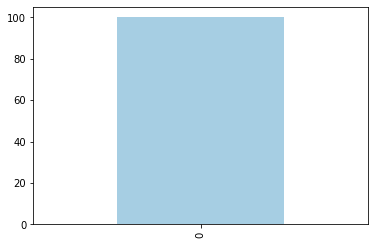

In [148]:
#plot
ax = df.score.value_counts().plot(kind="bar", colormap="Paired")
plt.show()

In [122]:
#print out tweet id, text and score = to review results
for index, i in enumerate(df["score"]):
    if i == 1:
        print(df["id"][index], df["clean text"][index], df["score"][index])

In [123]:
#Saving custom model - define where you would like your model to be saved. 

from pathlib import Path
output_dir=Path("/Users/tdubon/spaCy_models")

def save_model(output_dir):
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)
        
save_model(output_dir)

Saved model to /Users/tdubon/spaCy_models


In [124]:
### To load trained custom model to run on new data use:
#nlp = spacy.load("/Users/tdubon/spaCy_models")